In [51]:
import numpy as np
import pandas as pd 
import scipy 
from scipy import stats 
from scipy.interpolate  import interp1d
import glob 
from glob import glob
import os 
import natsort
from natsort import natsorted  
import matplotlib.pyplot as plot 
import mplcyberpunk

In [52]:
cd

/home/abhi


In [53]:
cd Desktop/data/eos_data/


/home/abhi/Desktop/data/eos_data


In [ ]:

filestr = glob("../15nsat_cse_natural_R14/macro/*.dat")
file = natsorted(filestr)


In [55]:
# file = (glob("../15nsat_cse_natural_R14/macro/*.dat"))
# sortfile = s(file)
# file

In [56]:
Radius = []

In [6]:
for i in range(0,15000):

 data = pd.read_csv(file[i] ,sep='\t')
 
    
    
 R = data.iloc[:,0].values
 M = data.iloc[:,1].values


 f = scipy.interpolate.interp1d(M,R)

 r1 = f(1.4)
 Radius.append(r1)

#Radius
R = np.array(Radius)
print((R))

[ 8.96224186 11.77061851 11.29917617 ... 11.77061851 11.4204551
 11.73577961]


In [7]:
len(R)

15000

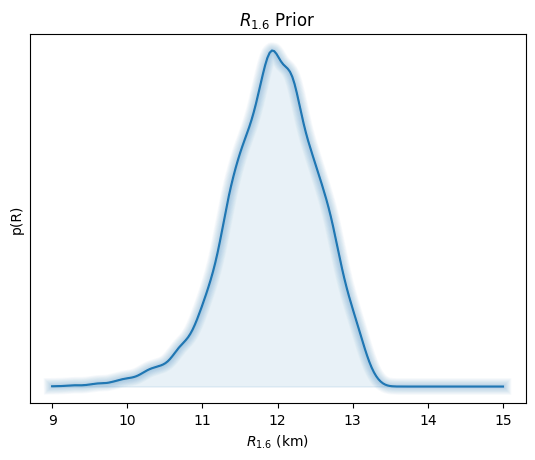

In [57]:
kde1 = scipy.stats.gaussian_kde(R)
kde1
x = np.linspace(9,15,200)
kde =  kde1.pdf(x)
#kde
plot.plot(x,kde)
mplcyberpunk.add_glow_effects()
plot.title('$R_{1.6}$ Prior')

plot.xlabel('$R_{1.6}$ (km)')
plot.ylabel('p(R)')
plot.gca().set_yticks([])

plot.show()

In [58]:
# 95% confidence intervel 

intervel = stats.t.interval(alpha=0.95, loc=np.mean(kde), scale=stats.sem(kde) , df=len(kde)-1)
intervel 

(0.1344745342605465, 0.1971744746168681)

In [78]:
cd

/home/abhi


In [79]:
cd Desktop/Project\ 


/home/abhi/Desktop/Project 


In [80]:
cd bayestack-main/priors/


/home/abhi/Desktop/Project /bayestack-main/priors


In [81]:
data1 = pd.DataFrame(R)
#data1



data1.to_csv("R14.txt" , index=False)


In [72]:
newfile = pd.read_csv("R14.txt")

data2 = pd.read_csv("posterior_probability.txt")


newfile


,0
0,8.962242
1,11.770619
2,11.299176
3,11.868749
4,11.731810
...,...
14995,11.599232
14996,11.225067
14997,11.770619
14998,11.420455


In [82]:
newfile["New Column"] = data2
newfile.to_csv("R14.txt" , index=False , sep = '\t')

In [74]:
df

,0,New Column
0,8.962242,NaN
1,11.770619,NaN
2,11.299176,NaN
3,11.868749,NaN
4,11.731810,NaN
...,...,...
14995,11.599232,0.005206
14996,11.225067,0.001918
14997,11.770619,0.000664
14998,11.420455,0.001262


In [48]:
df = pd.read_csv("R14.txt" , sep = '\t')
df

,0,New Column
0,8.962242,0.000000
1,11.770619,0.000000
2,11.299176,0.000000
3,11.868749,0.000000
4,11.731810,0.000000
...,...,...
14995,11.599232,0.000695
14996,11.225067,0.001343
14997,11.770619,0.002300
14998,11.420455,0.001417


In [75]:
df["New Column"]= df["New Column"].shift(1)


In [77]:
df.to_csv("R14.txt" , index=False , sep = '\t')